In [12]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

In [13]:
import re
def rm_tags(text):
    re_tag = re.compile(r'<[^>]+>')
    return re_tag.sub('', text)

In [14]:
import os
def read_files(filetype):
    path = 'data/aclImdb/'
    file_list = []
    
    positive_path = path + filetype + '/pos/'
    for f in os.listdir(positive_path):
        file_list += [positive_path + f]
        
    negative_path = path + filetype + '/neg/'
    for f in os.listdir(negative_path):
        file_list += [negative_path + f]
        
    print('Read', filetype, 'files', len(file_list))
    
    # In file_list:
    # Index:     0~12499 = positive
    # Index: 12500~24999 = negative
    all_labels = ([1] * 12500 + [0] * 12500)
    all_texts = []
    
    for fi in file_list:
        with open(fi, encoding='utf8') as file_input:
            all_texts += [rm_tags(" ".join(file_input.readlines()))]
            
    return all_texts, all_labels

In [15]:
text_train, y_train = read_files('train')
text_test, y_test = read_files('test')

Read train files 25000
Read test files 25000


In [39]:
token = Tokenizer(num_words=5000)
token.fit_on_texts(text_train)

In [41]:
X_train_seq = token.texts_to_sequences(text_train)
X_test_seq = token.texts_to_sequences(text_test)

In [47]:
X_train = sequence.pad_sequences(X_train_seq, maxlen=300)
X_test = sequence.pad_sequences(X_test_seq, maxlen=300)

In [48]:
print(len(X_train_seq[104]))
print(len(X_train[104]))
print(len(X_train_seq[6]))
print(len(X_train[1]))

504
300
101
300


In [49]:
print((X_train[6]))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  

In [69]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

model = Sequential()
model.add(Embedding(output_dim=32, input_dim=5000, input_length=300))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 32)           160000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 300, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 177,025
Trainable params: 177,025
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
train_history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=100, verbose=2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
194s - loss: 0.5487 - acc: 0.7160 - val_loss: 0.7173 - val_acc: 0.6404
Epoch 2/10
212s - loss: 0.3006 - acc: 0.8741 - val_loss: 0.5421 - val_acc: 0.7624
Epoch 3/10
213s - loss: 0.2384 - acc: 0.9079 - val_loss: 0.3201 - val_acc: 0.8674
Epoch 4/10
253s - loss: 0.2111 - acc: 0.9211 - val_loss: 0.4316 - val_acc: 0.8306
Epoch 5/10
211s - loss: 0.1965 - acc: 0.9257 - val_loss: 0.7603 - val_acc: 0.7426
Epoch 6/10
195s - loss: 0.1796 - acc: 0.9313 - val_loss: 0.3749 - val_acc: 0.8608
Epoch 7/10
189s - loss: 0.1701 - acc: 0.9363 - val_loss: 0.4369 - val_acc: 0.8194
Epoch 8/10
190s - loss: 0.1600 - acc: 0.9404 - val_loss: 0.3073 - val_acc: 0.8796
Epoch 9/10
191s - loss: 0.1442 - acc: 0.9469 - val_loss: 0.6817 - val_acc: 0.7784
Epoch 10/10
198s - loss: 0.1362 - acc: 0.9499 - val_loss: 0.7217 - val_acc: 0.7894


In [73]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

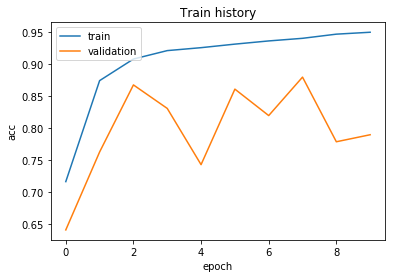

In [74]:
show_train_history(train_history, 'acc', 'val_acc')

In [75]:
scores = model.evaluate(X_test, y_test, verbose=1)

25000/25000 [==============================] - 135s     

In [76]:
scores[1]

0.85307999999999995

In [77]:
%save nlp_imdb.py 12-15 39 41 47-49 69-76

The following commands were written to file `nlp_imdb.py`:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import re
def rm_tags(text):
    re_tag = re.compile(r'<[^>]+>')
    return re_tag.sub('', text)
import os
def read_files(filetype):
    path = 'data/aclImdb/'
    file_list = []
    
    positive_path = path + filetype + '/pos/'
    for f in os.listdir(positive_path):
        file_list += [positive_path + f]
        
    negative_path = path + filetype + '/neg/'
    for f in os.listdir(negative_path):
        file_list += [negative_path + f]
        
    print('Read', filetype, 'files', len(file_list))
    
    # In file_list:
    # Index:     0~12499 = positive
    # Index: 12500~24999 = negative
    all_labels = ([1] * 12500 + [0] * 12500)
    all_texts = []
    
    for fi in file_list:
        with open(fi, encoding='utf8') as file_input:
            all_texts += [rm_tags(" ".join(file_input.readlines()))]
            
    return all_te

In [78]:
model.save_weights('nlp_imdb.h5')